In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression

In [2]:
logic_df=pd.read_csv("book2.csv")
logic_df

,City,PM25,NO,NO2,AQI,AQI_BUCKET
0,Ahmedabad,71.56,3.51,16.83,190,2
1,Ahmedabad,119.80,4.13,24.07,233,3
2,Ahmedabad,106.71,5.39,25.59,297,3
3,Ahmedabad,118.49,4.11,28.94,330,4
4,Ahmedabad,106.01,4.28,27.31,252,3
...,...,...,...,...,...,...
232,Ahmedabad,206.89,145.32,55.67,971,5
233,Ahmedabad,54.59,2.31,18.33,114,2
234,Ahmedabad,89.64,5.42,25.75,270,3
235,Ahmedabad,51.72,1.89,21.15,188,2


In [3]:
print(logic_df.info())
print('\n')
print(logic_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        237 non-null    object 
 1   PM25        237 non-null    float64
 2   NO          237 non-null    float64
 3   NO2         237 non-null    float64
 4   AQI         237 non-null    int64  
 5   AQI_BUCKET  237 non-null    int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 11.2+ KB
None


             PM25          NO         NO2         AQI  AQI_BUCKET
count  237.000000  237.000000  237.000000  237.000000  237.000000
mean    73.337342   10.890042   18.801899  284.202532    3.126582
std     42.770441   11.950383    9.762807  159.808363    1.120310
min      3.040000    0.060000    0.080000   48.000000    0.000000
25%     40.290000    5.420000   11.940000  185.000000    2.000000
50%     61.060000    7.680000   16.700000  232.000000    3.000000
75%    100.170000   13.710000   22.5

In [4]:
# Checking for messing values
logic_df.isna().sum()

City          0
PM25          0
NO            0
NO2           0
AQI           0
AQI_BUCKET    0
dtype: int64

In [5]:
logic_df['AQI_BUCKET'].unique()

array([2, 3, 4, 5, 1, 0], dtype=int64)

In [6]:
logic_df

,City,PM25,NO,NO2,AQI,AQI_BUCKET
0,Ahmedabad,71.56,3.51,16.83,190,2
1,Ahmedabad,119.80,4.13,24.07,233,3
2,Ahmedabad,106.71,5.39,25.59,297,3
3,Ahmedabad,118.49,4.11,28.94,330,4
4,Ahmedabad,106.01,4.28,27.31,252,3
...,...,...,...,...,...,...
232,Ahmedabad,206.89,145.32,55.67,971,5
233,Ahmedabad,54.59,2.31,18.33,114,2
234,Ahmedabad,89.64,5.42,25.75,270,3
235,Ahmedabad,51.72,1.89,21.15,188,2


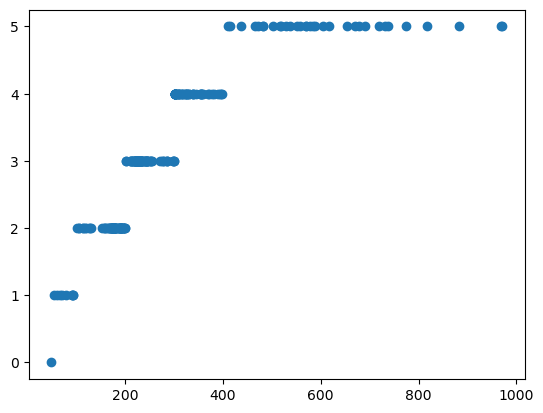

In [7]:
plt.scatter(logic_df['AQI'],logic_df['AQI_BUCKET'])

In [8]:
#logic_df['AQI_BUCKET'] = logic_df['AQI_BUCKET'].map({'Good' :0, 'Satisfactory' :1, 'Moderate' :2, 'Poor' :3, 'Very Poor' :4, 'Severe' :5}).astype(int)

In [9]:
X=logic_df[['AQI']]
#X=X.drop(['tenure'],axis=1)
Y=logic_df[['AQI_BUCKET']]


In [10]:
#from sklearn.preprocessing import StandardScaler ### Preprocess the data
#std_scl=StandardScaler()
#std_scl.fit(np_X)
#np_X_procs=std_scl.transform(np_X)
model=LogisticRegression()

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, Y_test = train_test_split(X,Y, test_size=0.09)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (215, 1) (215, 1)
Test set: (22, 1) (22, 1)


In [12]:

model.fit(X_train,y_train)


C:\Users\yashv\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\yashv\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [13]:
model.predict(X_test)


array([3, 2, 2, 5, 3, 3, 4, 1, 3, 4, 4, 4, 4, 5, 3, 3, 5, 5, 4, 3, 4, 5],
      dtype=int64)

In [14]:
model.score(X_test,Y_test)

#print("Accuracy:", accuracy)

1.0

In [15]:
input_array = np.array([200]).reshape(1, -1)

# Make predictions
predictions = model.predict(input_array)

# Use the predictions
print(predictions)


[2]


C:\Users\yashv\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [16]:
#logic_df['AQI_BUCKET'] = logic_df['AQI_BUCKET'].map({'Good' :0, 'Satisfactory' :1, 'Moderate' :2, 'Poor' :3, 'Very Poor' :4, 'Severe' :5}).astype(int)

In [20]:
def map_prediction_to_category(prediction):
    # Define mapping dictionary
    category_mapping = {
        0: 'Good',
        1: 'Satisfactory',
        2: 'Moderate',
        3: 'Poor',
        4: 'Very Poor',
        5: 'Severe'
    }
    
    # Map prediction to category
    if prediction in category_mapping:
        return category_mapping[prediction]
    else:
        return 'Unknown'  # Handle cases where prediction is not in the defined range

# Example usage:
predictions = [3]  # Sample predictions
predicted_categories = [map_prediction_to_category(pred) for pred in predictions]
print(predicted_categories)  # Output: ['Good', 'Satisfactory', 'Moderate', 'Poor', 'Very Poor', 'Severe']


['Poor']


In [21]:
def map_prediction_to_category(prediction):
    # Define mapping dictionary
    category_mapping = {
        0: ' ',
        1: 'Spider Plant,Lavender ,Aloe Vera,Areca Palm,Peace Lily',
        2: 'English Ivy ,Lavender ,Aloe Vera.',
        3: 'bamboo trees ,Fern ,Baby Rubber Plant ,Bamboo Palm ,Chinese Evergreen',
        4: 'Conifers, pines ,cypresses, bamboo trees,',
        5: 'walnut, silk or silver oak, Holly oak, red cedar, and fig'
    }
    
    # Map prediction to category
    if prediction in category_mapping:
        return category_mapping[prediction]
    else:
        return 'Unknown'  # Handle cases where prediction is not in the defined range

# Example usage:
predictions = [3]  # Sample predictions
predicted_categories = [map_prediction_to_category(pred) for pred in predictions]
print(predicted_categories)

['bamboo trees ,Fern ,Baby Rubber Plant ,Bamboo Palm ,Chinese Evergreen']
